<a href="https://colab.research.google.com/github/AnnaVithoriaMS/Analise-de-dados-de-diamantes/blob/main/data_Doen%C3%A7aCora%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importa bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from plotnine import *

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/imdb_top_1000.csv')

Item 1


In [ ]:
df.head()

In [ ]:
df.groupby('stroke')[u'gender'].value_counts()

stroke  gender
0       Female    2853
        Male      2007
        Other        1
1       Female     141
        Male       108
Name: gender, dtype: int64

In [ ]:
df.groupby('stroke')[u'Residence_type'].value_counts()

stroke  Residence_type
0       Urban             2461
        Rural             2400
1       Urban              135
        Rural              114
Name: Residence_type, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [ ]:
print("Tamanho: ", df.shape)
print("Nome dos Atributos: ", df.columns)

Tamanho:  (1000, 16)
Nome dos Atributos:  Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


Item 2

In [ ]:
df.groupby(["stroke"]).agg({ "age": ["mean", "std","skew","count"],
                            "bmi": ["mean", "std","skew","count"],
                            "hypertension": ["mean", "std" , "skew","count"],
                            "avg_glucose_level": ["mean", "std","skew","count"],
                            "heart_disease": ["mean", "std","skew","count"]
                             })

In [ ]:
df_sexo = df.groupby(['gender'])
df_sexo.hist(figsize=(10,4))

Hipertensão

In [ ]:
df_avc = df.groupby(['stroke'])
df_avc.hist(figsize=(20,5))

In [ ]:
df_avc.describe()

id                                     ...   bmi                  
         count          mean           std    min  ...   25%   50%   75%   max
stroke                                             ...                        
0       4861.0  36487.236371  21120.133386   67.0  ...  23.4  28.0  33.1  97.6
1        249.0  37115.068273  21993.344872  210.0  ...  26.4  29.7  33.7  56.6

[2 rows x 48 columns]

In [ ]:
df_hiper = df.groupby('hypertension')
df_hiper.count()

In [ ]:
df_hiper.hist(figsize=(10,4))

In [ ]:
df_card = df.groupby('heart_disease')
df_card.count()

In [ ]:
df_card.hist()

ITEM 2


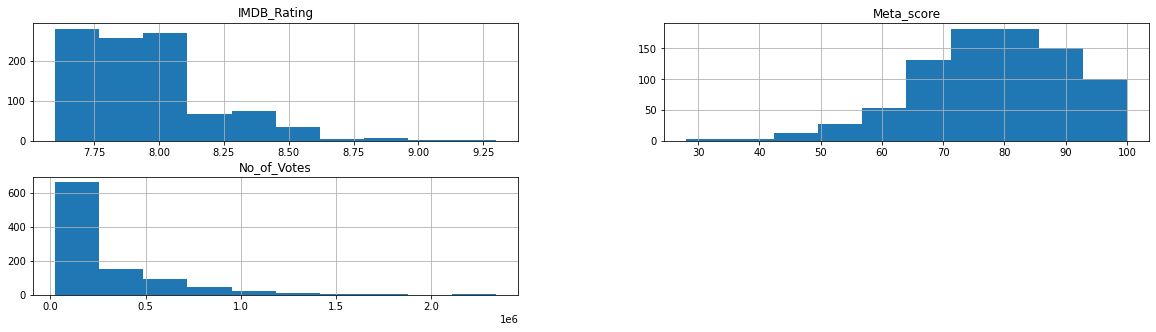

In [ ]:
df.hist(figsize=(20,5))
plt.show()

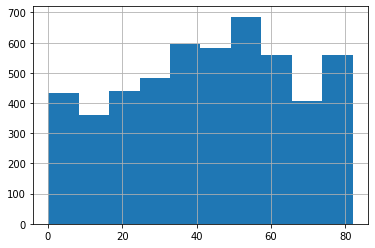

In [ ]:
df['age'].hist()

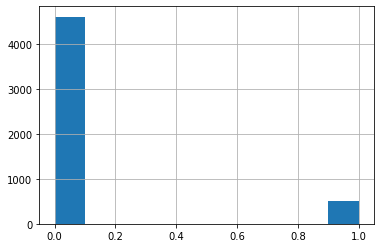

In [ ]:
df['hypertension'].hist()

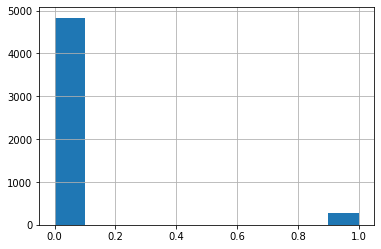

In [ ]:
df['heart_disease'].hist()


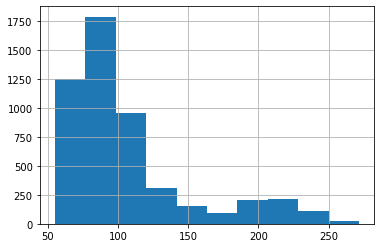

In [ ]:
df['avg_glucose_level'].hist()

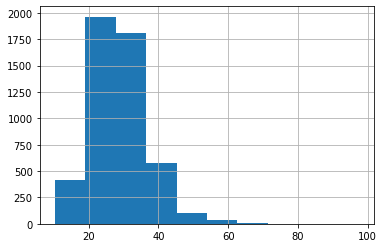

In [ ]:
df['bmi'].hist()

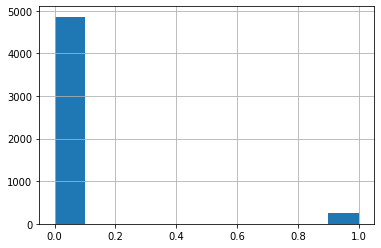

In [ ]:
df['stroke'].hist()

In [ ]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [ ]:
df.skew()

IMDB_Rating    1.016964
Meta_score    -0.605225
No_of_Votes    2.300011
dtype: float64

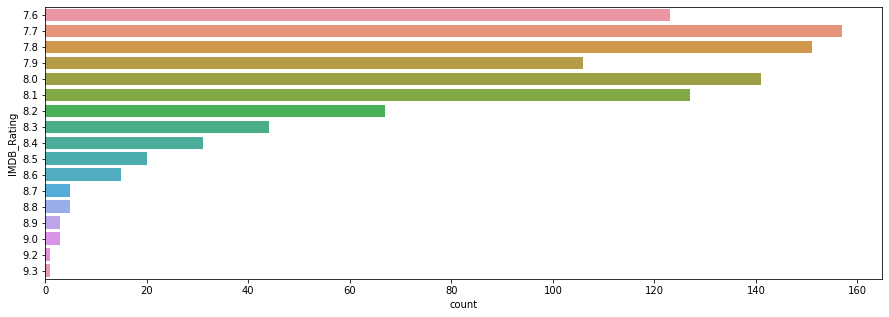

In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'IMDB_Rating' , data = df)
plt.show()

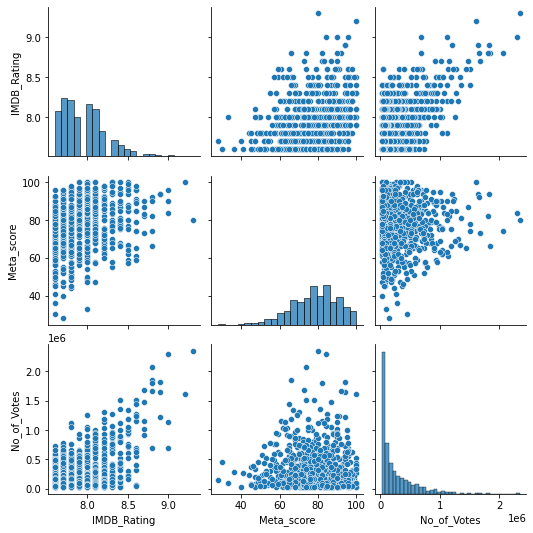

In [ ]:
sns.pairplot(df)
plt.show()

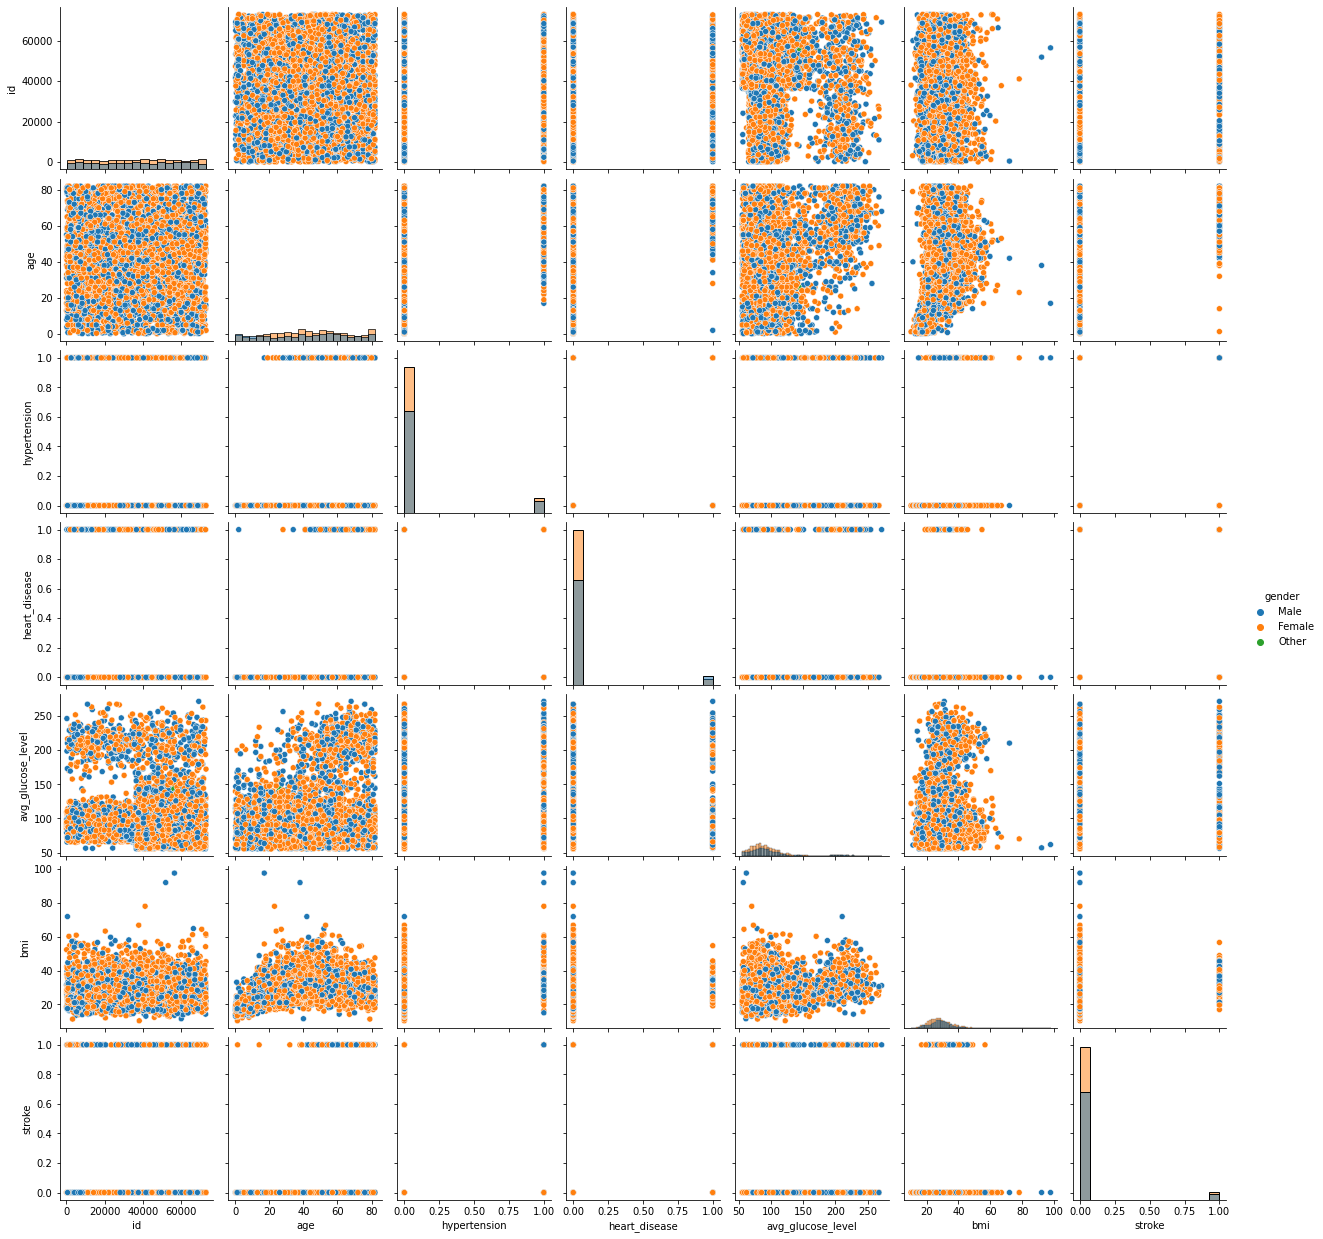

In [ ]:
sns.pairplot(df, hue= 'gender', diag_kind="hist")

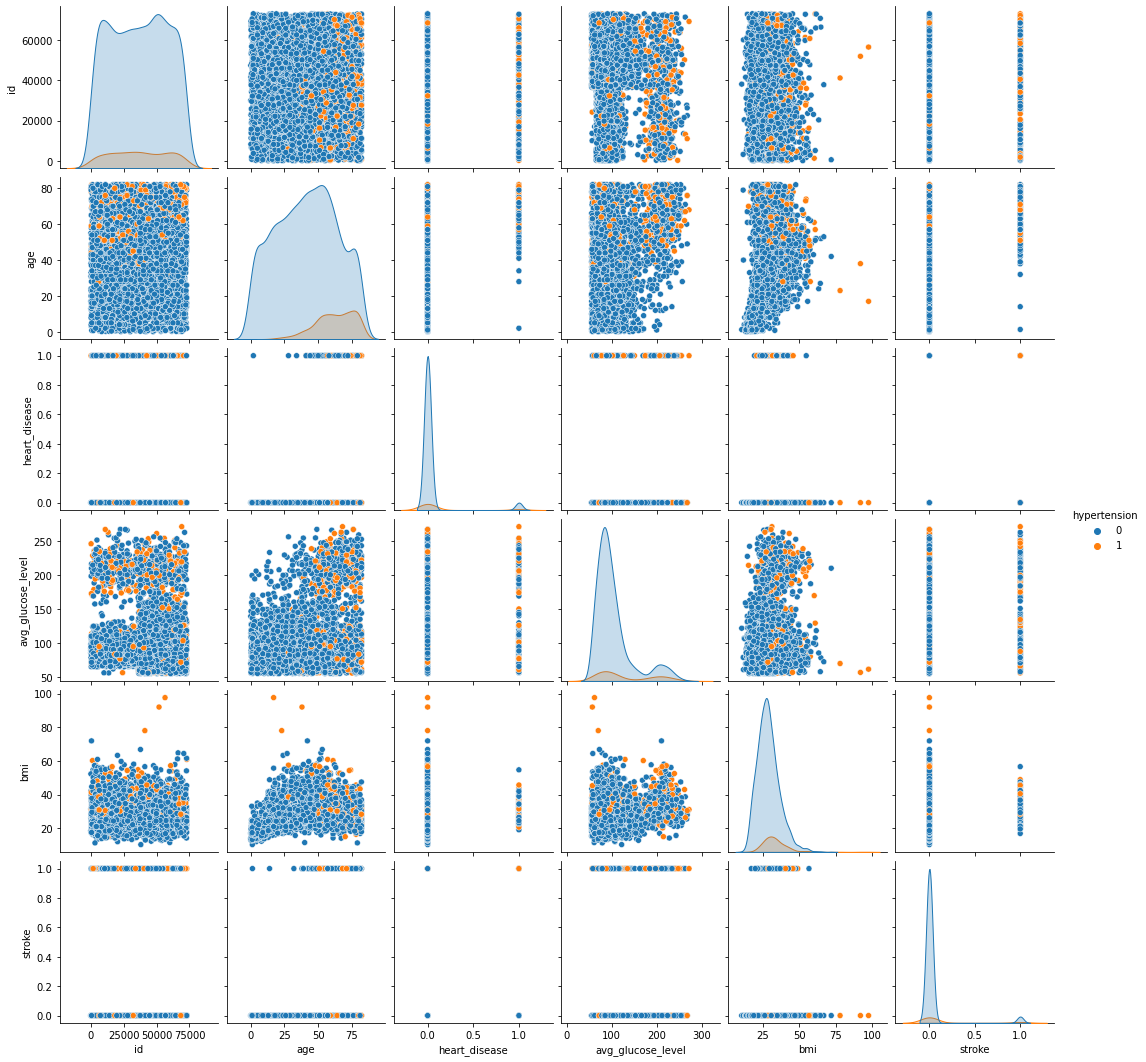

In [ ]:
sns.pairplot(df, hue= 'hypertension')

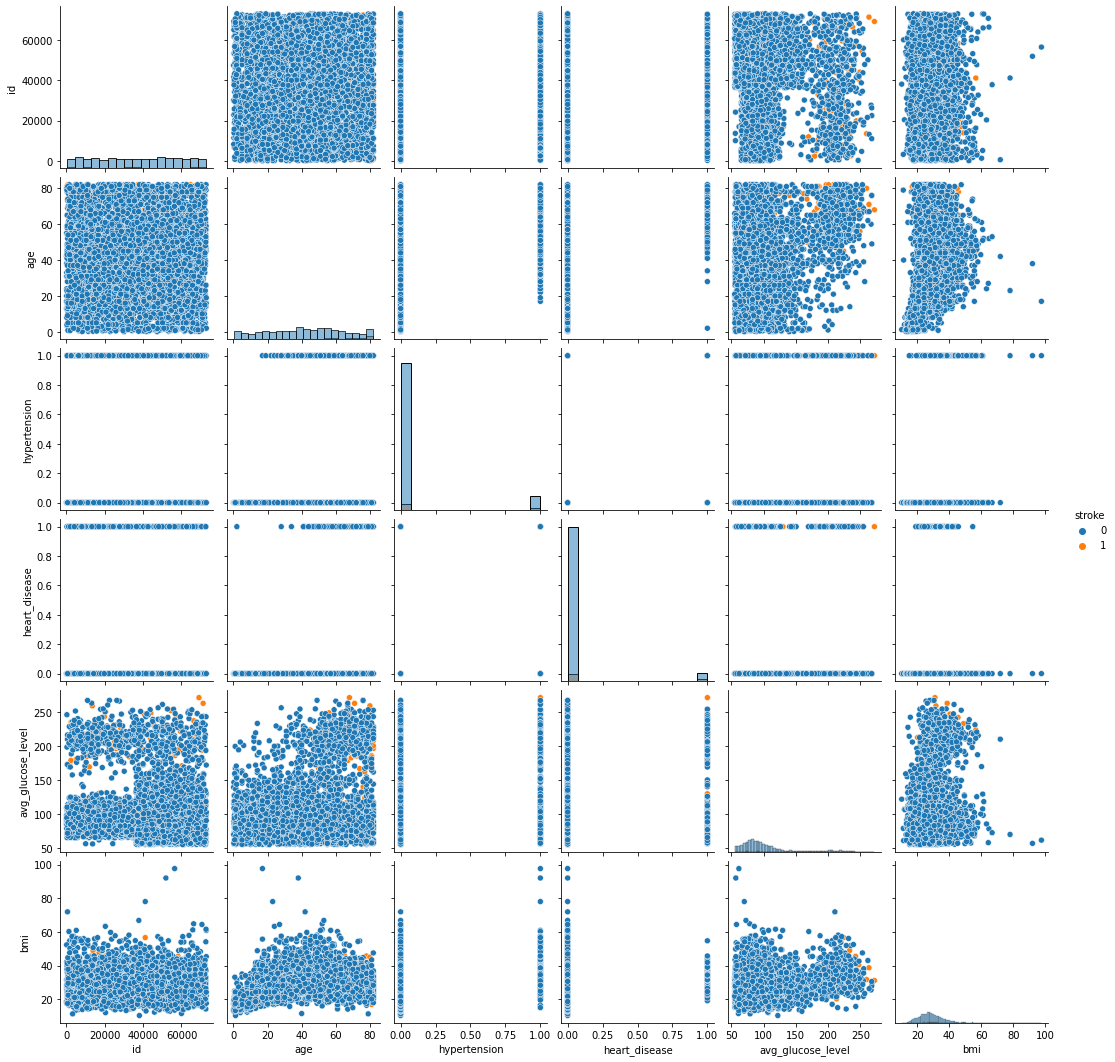

In [ ]:
sns.pairplot(df, hue= 'stroke', diag_kind="hist")

In [ ]:
sns.pairplot(df, hue= 'stroke',markers=["o", "s"])

Encontrar inexistentes


In [ ]:
df.isnull()

In [ ]:
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Subistituir inexistentes pela média

In [ ]:
df.fillna(df.mean(), inplace=True)
df.isnull


<bound method DataFrame.isnull of          id  gender   age  ...        bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.600000  formerly smoked      1
1     51676  Female  61.0  ...  28.893237     never smoked      1
2     31112    Male  80.0  ...  32.500000     never smoked      1
3     60182  Female  49.0  ...  34.400000           smokes      1
4      1665  Female  79.0  ...  24.000000     never smoked      1
...     ...     ...   ...  ...        ...              ...    ...
5105  18234  Female  80.0  ...  28.893237     never smoked      0
5106  44873  Female  81.0  ...  40.000000     never smoked      0
5107  19723  Female  35.0  ...  30.600000     never smoked      0
5108  37544    Male  51.0  ...  25.600000  formerly smoked      0
5109  44679  Female  44.0  ...  26.200000          Unknown      0

[5110 rows x 12 columns]>

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.max()

In [ ]:
df.min()

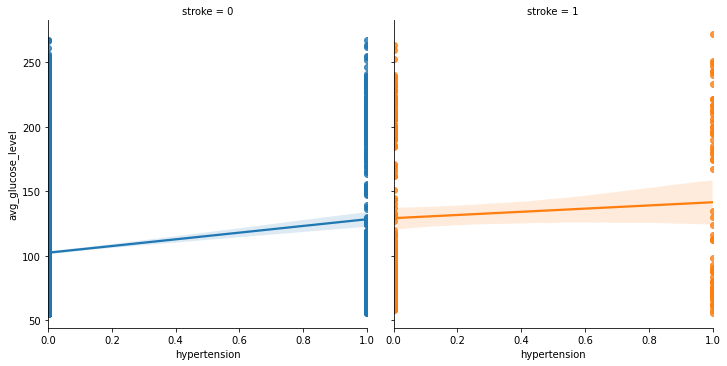

In [ ]:
sns.lmplot(x='hypertension', y='avg_glucose_level', data=df, hue= 'stroke', col='stroke')
plt.show()

In [ ]:
sns.relplot(x='heart_disease', y='avg_glucose_level', data=df, hue= 'stroke', col='stroke')
plt.show()

In [ ]:
sns.lmplot(x='age', y='hypertension', hue='stroke', data=df, col='stroke', row='gender')
plt.show()

In [ ]:
sns.histplot(df)

In [ ]:
sns.relplot(x='bmi', y='hypertension', hue='stroke', data=df, col='stroke', row='gender')
plt.show()

In [ ]:
sns.relplot(x='age', y='stroke', data=df, hue='stroke', col="gender")
plt.show()

In [ ]:
sns.relplot(x='avg_glucose_level', y='bmi', data=df, hue='stroke', col="stroke")
plt.show()

In [ ]:
sns.relplot(x='bmi', y='stroke', data=df, hue='stroke', col="gender")
plt.show()

In [ ]:
sns.relplot(x="age", y='stroke', data=df, row="gender", col="smoking_status",
           hue='smoking_status',    height=3)
plt.show()

In [ ]:
sns.lmplot(x='bmi', y='avg_glucose_level', data=df, hue='stroke', col="stroke")
plt.show()

In [ ]:
sns.lmplot(x='age', y='bmi', data=df, hue='stroke', col="stroke")
plt.show()


Correlação

In [ ]:
corr = df.corr()
corr

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


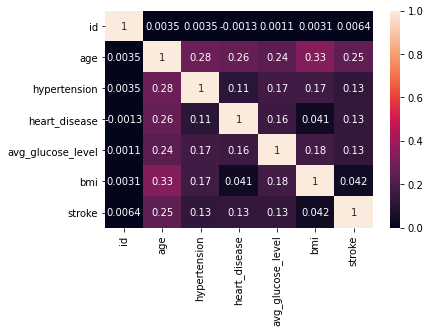

In [ ]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot =True)

In [ ]:
matrix = df.corr()
matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.038947
id                   0.006388
Name: stroke, dtype: float64

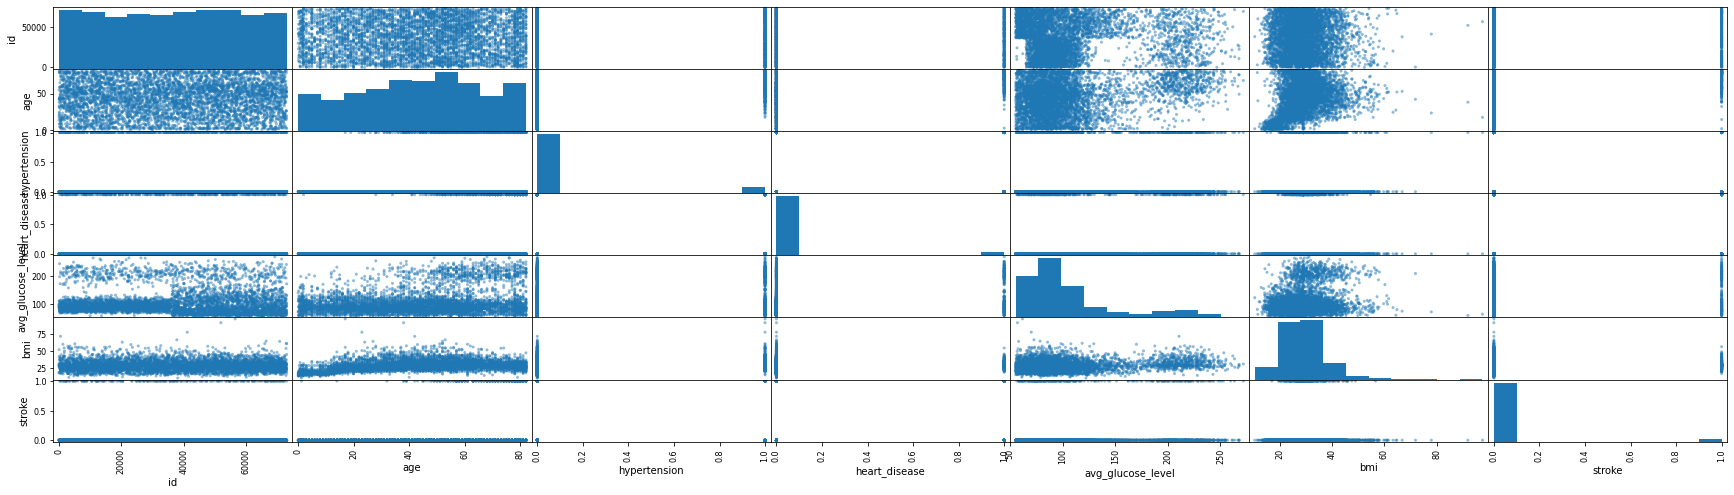

In [ ]:
pd.plotting.scatter_matrix(df,  figsize=(30, 8))
plt.show()

Outliers


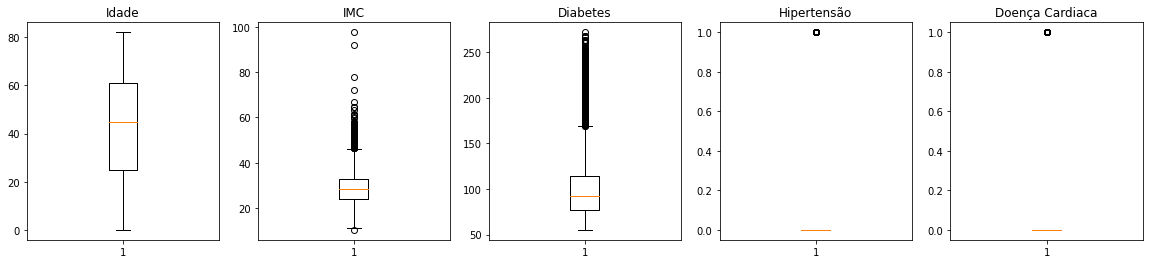

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20,4))
axes[0].boxplot(df['age'])
axes[0].set_title("Idade")
axes[1].boxplot(df['bmi'])
axes[1].set_title("IMC")
axes[2].boxplot(df['avg_glucose_level'])
axes[2].set_title("Diabetes")
axes[3].boxplot(df['hypertension'])
axes[3].set_title("Hipertensão")
axes[4].boxplot(df['heart_disease'])
axes[4].set_title("Doença Cardiaca")
plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

id                   36940.750
age                     36.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       36.845
bmi                      9.000
stroke                   0.000
dtype: float64

In [ ]:
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

In [ ]:
outliers_iqr= df[outliers.any(axis=1)]
outliers_iqr

Dividir dados somente com atributos numéricos

In [ ]:
import numpy.linalg as la 
DF =  df.select_dtypes(include=np.number)
DF.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.600000,1
1,51676,61.0,0,0,202.21,28.893237,1
2,31112,80.0,0,1,105.92,32.500000,1
3,60182,49.0,0,0,171.23,34.400000,1
4,1665,79.0,1,0,174.12,24.000000,1


In [ ]:
DF.isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

In [ ]:
DF.boxplot()

In [ ]:
mat_cov = np.cov(np.transpose(DF))

In [ ]:
display("Covarancia", mat_cov)

In [ ]:
w,v=la.eig(mat_cov)
w 

array([4.47818462e+08, 2.09051832e+03, 4.78866574e+02, 5.18134454e+01,
       8.02674269e-02, 4.14612964e-02, 4.80858897e-02])

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()                                    # inicializa classe
pca.fit(DF)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.components_

array([[-1.00000000e+00, -3.78065346e-06, -4.97520969e-08,
         1.38440460e-08, -2.33752244e-06, -1.09092259e-06,
        -6.49994474e-08],
       [-2.92551941e-06,  1.53697269e-01,  1.24912148e-03,
         8.82981637e-04,  9.87568926e-01,  3.28928719e-02,
         6.96553586e-04],
       [ 3.46592567e-06, -9.81445951e-01, -3.11894381e-03,
        -2.23847969e-03,  1.56441292e-01, -1.10774812e-01,
        -2.04213260e-03],
       [-6.14924238e-07, -1.14542483e-01,  2.22649017e-03,
        -2.17323429e-03, -1.52567268e-02,  9.93294716e-01,
        -1.78298873e-03],
       [-3.78538266e-08, -3.37107777e-03,  9.93041495e-01,
         6.39162988e-02, -7.81325416e-04, -2.30942919e-03,
         9.88230117e-02],
       [-1.95062470e-09, -3.02737225e-03, -1.01926299e-01,
         8.86903832e-01, -5.97927833e-04,  2.61939377e-03,
         4.50551039e-01],
       [-5.90137239e-08, -6.96981137e-04, -5.88504308e-02,
        -4.57499493e-01, -5.52413746e-05,  6.42381129e-04,
         8.8725979

In [ ]:
 pca.explained_variance_ratio_ 

array([9.99994146e-01, 4.66819985e-06, 1.06932566e-06, 1.15701219e-07,
       1.79239946e-10, 1.07377458e-10, 9.25845119e-11])

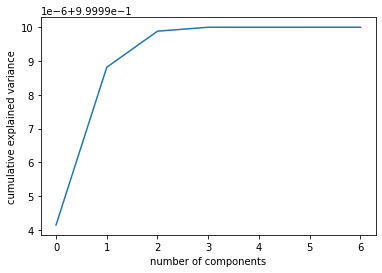

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca.explained_variance_

array([4.47818462e+08, 2.09051832e+03, 4.78866574e+02, 5.18134454e+01,
       8.02674269e-02, 4.80858897e-02, 4.14612964e-02])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


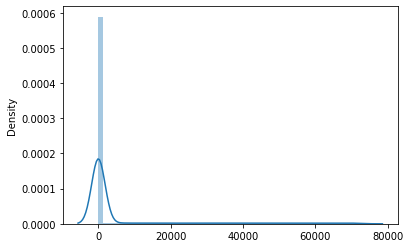

In [ ]:
sns.distplot(DF)
plt.show()

In [ ]:
pca = PCA(2)  
projected = pca.fit_transform(DF)
print(DF.shape)
print(projected.shape)


(5110, 7)
(5110, 7)


In [ ]:
projected

array([[ 2.74718290e+04,  1.25008138e+02, -5.11430042e+00, ...,
        -1.34951860e-01,  1.15252881e+00,  4.00204475e-01],
       [-1.51581709e+04,  9.75560335e+01, -2.36448401e+00, ...,
        -1.41767680e-01,  2.79352142e-01,  8.55882212e-01],
       [ 5.40582921e+03,  5.56294991e+00, -3.65487394e+01, ...,
        -7.42191722e-02,  1.17579802e+00,  3.93989744e-01],
       ...,
       [ 1.67948294e+04, -2.40291399e+01,  4.20440893e+00, ...,
        -6.25251587e-02, -1.66692494e-02, -3.68813625e-03],
       [-1.02617081e+03,  6.04779079e+01,  2.14847366e+00, ...,
        -1.70674257e-01, -1.28046325e-01, -2.37050302e-02],
       [-8.16117060e+03, -2.06020695e+01, -3.69644926e+00, ...,
        -8.54372855e-02, -5.68588667e-02, -1.43866927e-02]])

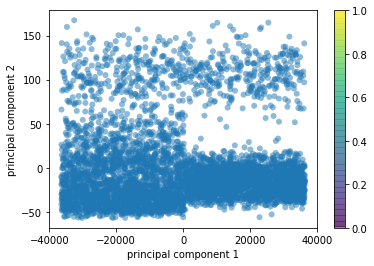

In [ ]:

plt.scatter(projected[:, 0], projected[:, 1],
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('cividis', 10))
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.colorbar();

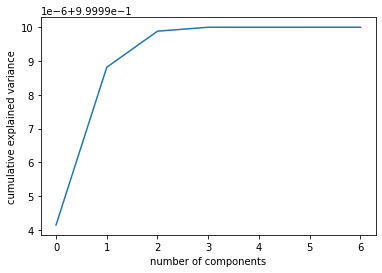

In [ ]:
pca = PCA().fit(DF)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');